# Visualisation of the Results

This file contains the generation of the following main figures (and table):
- **Fig 2**: Displays the posterior distribution of the $R_0$ values and the joint and marginal posterior distributions of $\beta$ and $\gamma$ for both ST131-A and ST131-C2.
- **Table 1**: Mean, median and 95% credible intervals for the parameters of interest $R_0$, $\beta$ and $\gamma$.
- **Fig 3**: The fit of the estimated parameters to the data.

Supporting information:
- **Fig. S1**: Estimated colonisation incidence in the population for clades A and C2.
- **Fig. S2**: Illustration of exponential smoothing and the effect of $\alpha$ on example data.
- **Fig. S3**: Discrepancy values as a ($\beta$, $\gamma$) scatterplot.
- **Fig. S4**: Posterior distributions of all estimated parameters for ST131-A.
- **Fig. S5**: Posterior distributions of all estimated parameters for ST131-C2.

In [7]:
# Set the directory to save the figures to:

savedir <- "res/article_vis/"

# parameter names and variables
reparam <- T
par1_var <- "par1"
par2_var <- "par2"
par1_name <- "Net transmission rate"
par2_name <- "R"


# Read the data
datadir <- "data/res/"
obs_data <- read.csv("data/NORM_incidence.csv") 

# truncated R, 100000, A: local, C2: cluster
#dir_A <- "res/elfi_res/A_results/clade_A_2024-12-11_13-19-28/csvs/" # additional years = 5, weighted predictionß
#"res/elfi_res/A_results/clade_A_2024-12-10_15-30-36/csvs/" # fixed Dt, not weighted prediction
#dir_C2 <- "res/elfi_res/C2_results/clade_C2_2024-12-10_15-28-38/csvs/"
dir_A <- "res/elfi_res/A_results/clade_A_2024-12-18_15-30-05/csvs/"
dir_C2 <- "res/elfi_res/C2_results/clade_C2_2024-12-18_14-32-36/csvs/"

# Set colors for each clade:
C2_col <- "#de8d16"
A_col <- "#34a8eb"

In [8]:
# Import libraries

library("ggplot2")
library("cowplot")
library("patchwork")

theme_set(theme_cowplot(12)) # font size
figwidth <- 3.4252 # width of the figures
figheight <- figwidth
wwide <- 4.488189 # 11.4 cm, for two column figures

y_ax_fs <- 8
x_ax_fs <- 6


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [9]:
# Read the prior and posterior samples from csv files

posterior_samples_A <- read.csv(paste(dir_A, "result_samples.csv", sep = ""))
prior_samples_A <- read.csv(paste(dir_A, "result_prior.csv", sep = ""))

posterior_samples_C2 <- read.csv(paste(dir_C2, "result_samples.csv", sep = ""))
prior_samples_C2 <- read.csv(paste(dir_C2, "result_prior.csv", sep = ""))

# Read the discrepancies
disc_samples_A <- read.csv(paste(dir_A, "result_discrepancies.csv", sep = ""))
disc_samples_C2 <- read.csv(paste(dir_C2, "result_discrepancies.csv", sep = ""))

In [10]:
dim(posterior_samples_A)
dim(posterior_samples_C2)

[1] 10000     3

[1] 10000     3

In [11]:
# Read the predicted fit generated by the ELFI nodes

pred_A <- read.csv(paste(dir_A, "BSI_yearly_node.csv", sep = ""))

pred_C2 <- read.csv(paste(dir_C2, "BSI_yearly_node.csv", sep = ""))

## Main Results

**Table 1**: Point estimates and credible intervals for all parameters of interest.

**Figure 2**: Posterior distributions of all parameters. Marginal and joint distributions for $\beta$ and $\gamma$. Saved as `posterior_panel.pdf`.

**Figure 3**: Observed data plotted alongside the estimated predicted data.


In [12]:
## Combine prior and posterior:

# Clade A

posterior_samples_A$distr <- rep("Posterior", dim(posterior_samples_A)[1])
prior_samples_A$distr <- rep("Prior", dim(prior_samples_A)[1])

df_A <- rbind(posterior_samples_A, prior_samples_A)

if (reparam){
    R_col <- rbind(posterior_samples_A[par2_var], prior_samples_A[par2_var])
    names(R_col) <- c("R0")
    df_A <- cbind(df_A, R_col)
}else{
    df_A$R0 <- c(posterior_samples_A$beta/posterior_samples_A$gamma, prior_samples_A$beta/prior_samples_A$gamma)
}

head(df_A)

,par1,par2,Dt,distr,R0
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,0.02595989,1.503243,0.0007423519,Posterior,1.503243
2,0.02703289,1.356628,0.0128635815,Posterior,1.356628
3,0.02633185,1.497483,0.0042269488,Posterior,1.497483
4,0.02569963,1.415802,0.0059768809,Posterior,1.415802
5,0.02651600,1.526683,0.0045458331,Posterior,1.526683
6,0.02462859,1.454714,0.0248699918,Posterior,1.454714


In [13]:
# Clade C2

posterior_samples_C2$distr <- rep("Posterior", dim(posterior_samples_C2)[1])
prior_samples_C2$distr <- rep("Prior", dim(prior_samples_C2)[1])

df_C2 <- rbind(posterior_samples_C2, prior_samples_C2)

if (reparam){
    R_col <- rbind(posterior_samples_C2[par2_var], prior_samples_C2[par2_var])
    names(R_col) <- c("R0")
    df_C2 <- cbind(df_C2, R_col)
}else{
    df_C2$R0 <- c(posterior_samples_C2$beta/posterior_samples_C2$gamma, prior_samples_C2$beta/prior_samples_C2$gamma)
}

head(df_C2)

,par1,par2,Dt,distr,R0
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,0.02320486,1.127707,0.007359016,Posterior,1.127707
2,0.01968314,1.123626,0.016475054,Posterior,1.123626
3,0.02428706,1.126978,0.012679675,Posterior,1.126978
4,0.02259892,1.113965,0.014528497,Posterior,1.113965
5,0.02548007,1.122828,0.010173798,Posterior,1.122828
6,0.02659176,1.121870,0.022253839,Posterior,1.121870


In [14]:
# Let's merge the data

df_A$clade <- rep("A", dim(df_A)[1])
df_C2$clade <- rep("C2", dim(df_C2)[1])
df <- rbind(df_A, df_C2)

# Save labels for R0 for A and C2:
lab_A <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(median(df_A[which(df_A$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))
lab_C2 <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(median(df_C2[which(df_C2$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))

print(lab_A)
print(lab_C2)

lab_A_mean <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(mean(df_A[which(df_A$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))
lab_C2_mean <- as.character(paste(expression(R[0]),"==", deparse(formatC(signif(mean(df_C2[which(df_C2$distr == "Posterior"),"R0"]), 3), format='f', digits=2 ))))


[1] "R[0] == \"1.47\""
[1] "R[0] == \"1.13\""


### Table 1

Mean, median and 95% credible intervals for $R_0$, $\beta$ and $\gamma$.

In [15]:
# Get the point estimates and 95% credible intervals for Table 1

get_summary <- function(df, clade, param){
    # Get the mean, median and 95% CI for a given parameter and clade
    # Returns a data frame
    d <- 3
    sp <- '%#.3g'
    if(param == "R0"){
        d <- 3
        sp <- '%#.3g'}
    mu <- sprintf(sp, signif(mean(df[which(df$clade == clade & df$distr == "Posterior"), param]), digits = d))
    med <- sprintf(sp, signif(median(df[which(df$clade == clade & df$distr == "Posterior"), param]), digits = d))
    ci95 <- quantile(df[which(df$clade == clade & df$distr == "Posterior"), param], probs = c(0.0025, 0.975))

    tab <- data.frame("clade" = clade, "param" = param,
    "mean" = mu, "median" = med,
    "ci95_lower" = sprintf(sp,signif(ci95["0.25%"], digits = 3)), "ci95_upper" = sprintf(sp,signif(ci95["97.5%"], digits = 2)))

    return(tab)
}

rbind(get_summary(df, "A", "R0"), get_summary(df, "A", par1_var), get_summary(df, "A", par2_var))
rbind(get_summary(df, "C2", "R0"), get_summary(df, "C2", par1_var), get_summary(df, "C2", par2_var))

clade,param,mean,median,ci95_lower,ci95_upper
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A,R0,1.47,1.47,1.30,1.60
A,par1,0.0249,0.0248,0.0211,0.0280
A,par2,1.47,1.47,1.30,1.60


clade,param,mean,median,ci95_lower,ci95_upper
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
C2,R0,1.13,1.13,1.08,1.20
C2,par1,0.0228,0.0227,0.0185,0.0260
C2,par2,1.13,1.13,1.08,1.20


### Figure 2a: $R_0$ Posterior distribution

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


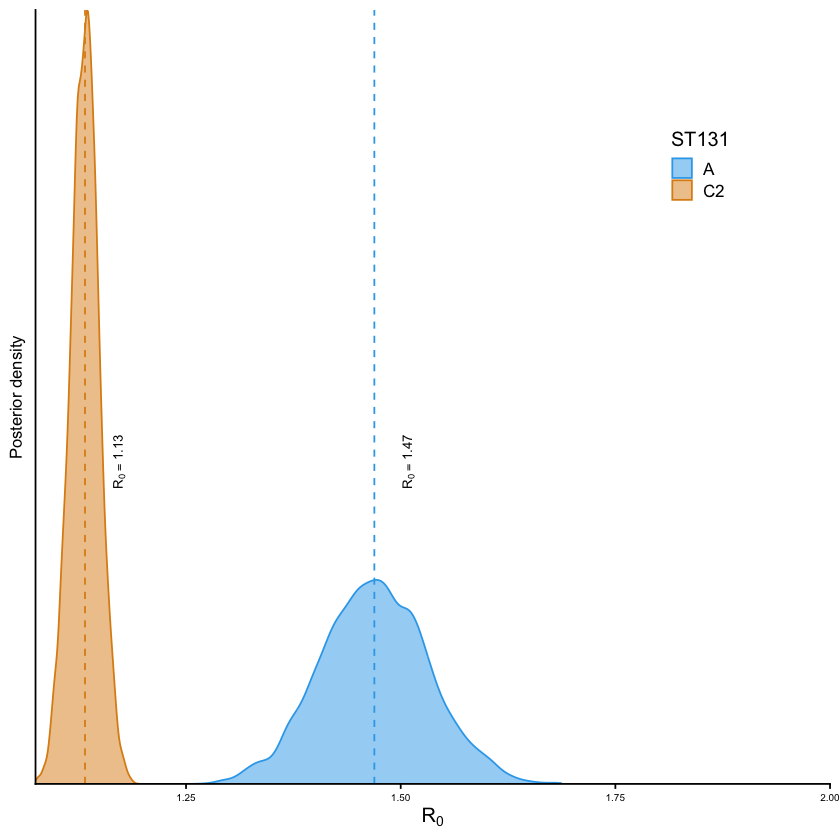

In [16]:
# Faster R0 figure
x_offset <- 0.04
y_offset <- 10
p_R0 <- ggplot(df[which(df$distr == "Posterior"),], aes(fill = clade, x = R0)) + 
    labs(title = NULL, x = expression(R[0]), y = "Posterior density") +
    coord_cartesian(xlim = c(min(df_C2[which(df_C2$distr == "Posterior"),"R0"]), 2), expand = FALSE) +
    geom_density(aes(color = clade), alpha = 0.5) +
    scale_color_manual(name = "ST131", values = c(A_col, C2_col), labels = c("A", "C2")) +
    scale_fill_manual(name = "ST131", values = c(A_col, C2_col), labels = c("A", "C2")) +
    scale_linetype_manual(name = "Estimate", values = c("dashed", "solid"), labels = c("Median", "Mean")) +
    geom_vline(xintercept = median(df_A[which(df_A$distr == "Posterior"),"R0"]), color = A_col, linewidth = 0.5, linetype = "dashed") +
    annotate("text", x = median(df_A[which(df_A$distr == "Posterior"),"R0"]) + x_offset, y = y_offset, angle = 90, label = lab_A, size = 8/.pt, parse = TRUE) +
    geom_vline(xintercept = median(df_C2[which(df_C2$distr == "Posterior"),"R0"]), color = C2_col, linewidth = 0.5, linetype = "dashed") +
    annotate("text", x = median(df_C2[which(df_C2$distr == "Posterior"),"R0"]) + x_offset, y = y_offset, angle = 90, label = lab_C2, size = 8/.pt, parse = TRUE) +
    theme(legend.position = c(0.8, 0.8), axis.ticks.y=element_blank(), axis.text.x = element_text(size = x_ax_fs), axis.text.y = element_blank(), axis.title.y = element_text(size = 10))

p_R0

ggsave(p_R0, filename = paste(savedir, "R0_plot.pdf", sep = ""), width = 10, height = 13, unit = "cm") #, width = 8.7, height = 8.7, units = "cm")

### Figure 2b-c: Joint and marginal posterior distributions for net transmission and R

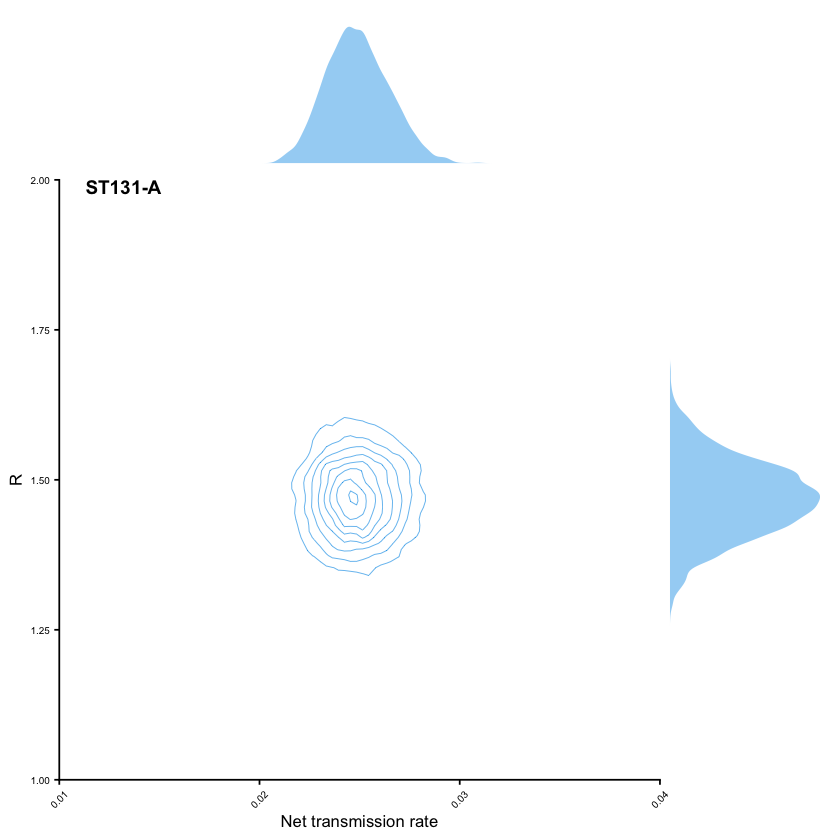

In [17]:
# 2d densityplot with marginals

# Axis limits
xmax <- 0.04
xmin <- 0.01
ymax <- 2
ymin <- 1

## Clade A

# Adjust margin and vjust jointly to get rid of the extra whitespace
col <- "darkgrey"
p_joint_A <- ggplot(df_A[which(df_A$distr == "Posterior"),], aes(x = par1, y = par2)) +
    geom_density_2d(colour = A_col, linewidth = 0.2) +
    labs(y = par2_name, x = par1_name, title = "ST131-A") +
    scale_x_continuous(name = par1_name, limits = c(xmin, xmax), expand = c(0, 0)) +
    scale_y_continuous(name = par2_name, limits = c(ymin, ymax), expand = c(0, 0)) +
    theme(plot.margin = margin(0),
          plot.title = element_text(vjust = 1, hjust = 0.05, margin = margin(0, 0, -20, 0)),
          axis.text.x = element_text(angle = 45, vjust = 0.5, size = x_ax_fs),
          axis.text.y = element_text(size = x_ax_fs),
          text = element_text(size = 10))

p_d_gamma_A <- ggplot(df_A[which(df_A$distr == "Posterior"),], aes(x = par2)) +
    geom_density(color = FALSE, fill = A_col, alpha = 0.5) +
    scale_x_continuous(name = par2_name, limits = c(ymin, ymax), expand = c(0, 0, 0, 0)) +
    theme_void() + 
    theme(plot.margin = margin(0), plot.title = element_blank(),axis.title.x = element_blank()) +
    coord_flip(expand = FALSE) #xlim = c(ymin, ymax), 


p_d_beta_A <- ggplot(df_A[which(df_A$distr == "Posterior"),], aes(x = par1)) +
    geom_density(col = FALSE, fill = A_col, alpha = 0.5) +
    scale_x_continuous(name = par1_name, limits = c(xmin, xmax), expand = c(0, 0)) +
    theme_void() +
    theme(plot.margin = margin(0), plot.title = element_blank(),axis.title.x = element_blank())
                
p_d_beta_A + plot_spacer() + p_joint_A + p_d_gamma_A +
plot_layout(ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))

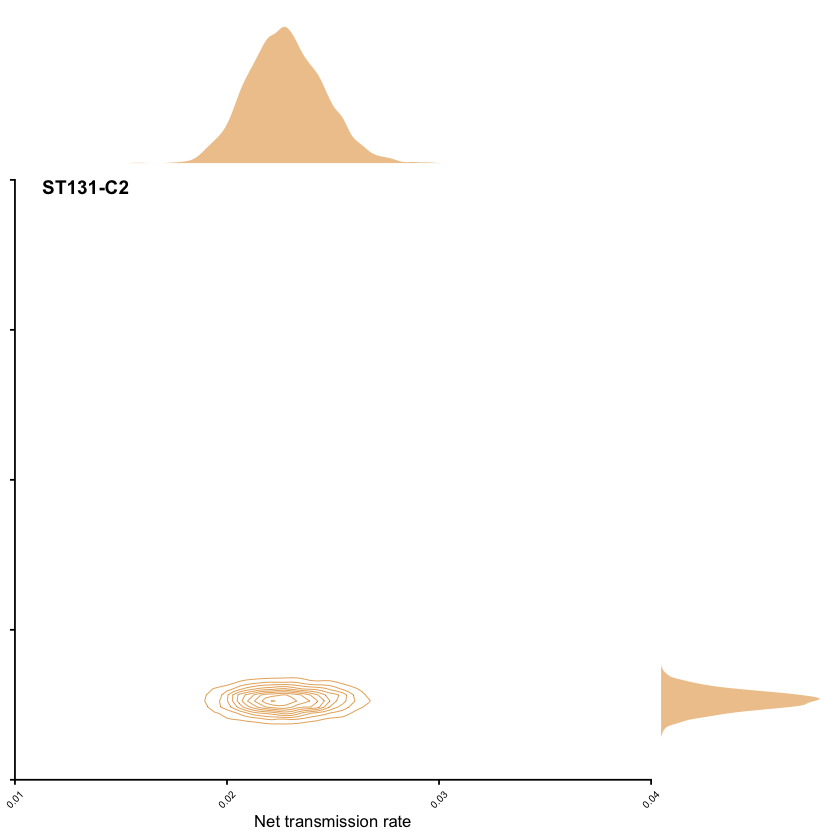

In [18]:
# Clade C2

p_joint_C2 <- ggplot(df_C2[which(df_C2$distr == "Posterior"),], aes(x = par1, y = par2)) +
    geom_density_2d(colour = C2_col, linewidth = 0.2) +
    labs(y = NULL, x = par1_name, title = "ST131-C2") +
    scale_x_continuous(name = par1_name, limits = c(xmin, xmax), expand = c(0, 0)) +
    scale_y_continuous(limits = c(ymin, ymax), expand = c(0, 0)) +
    theme(plot.margin = margin(0),
          axis.text.y = element_blank(), 
          plot.title = element_text(vjust = 1, hjust = 0.05, margin=margin(0, 0, -20, 0)),
          axis.text.x = element_text(angle = 45, vjust = 0.5, size = x_ax_fs),
          text = element_text(size = 10))

p_d_gamma_C2 <- ggplot(df_C2[which(df_C2$distr == "Posterior"),], aes(x = par2)) +
    geom_density(color = FALSE, fill = C2_col, alpha = 0.5) +
    scale_x_continuous(name = par2_name, limits = c(ymin, ymax), expand = c(0, 0, 0, 0)) +
    theme_void() +
    theme(plot.margin = margin(0)) +
    coord_flip(expand = FALSE) # xlim = c(ymin, ymax), 

p_d_beta_C2 <- ggplot(df_C2[which(df_C2$distr == "Posterior"),], aes(x = par1)) +
    geom_density(color = FALSE, fill = C2_col, alpha = 0.5) +
    scale_x_continuous(name = par1_name, limits = c(xmin, xmax), expand = c(0, 0)) +
    coord_cartesian(xlim = c(xmin, xmax)) +
    theme(plot.margin = margin(0)) +
    theme_void()
                
p_d_beta_C2 + plot_spacer() + p_joint_C2 + p_d_gamma_C2 +
plot_layout(ncol = 2, nrow = 2, widths = c(4, 1), heights = c(1, 4))


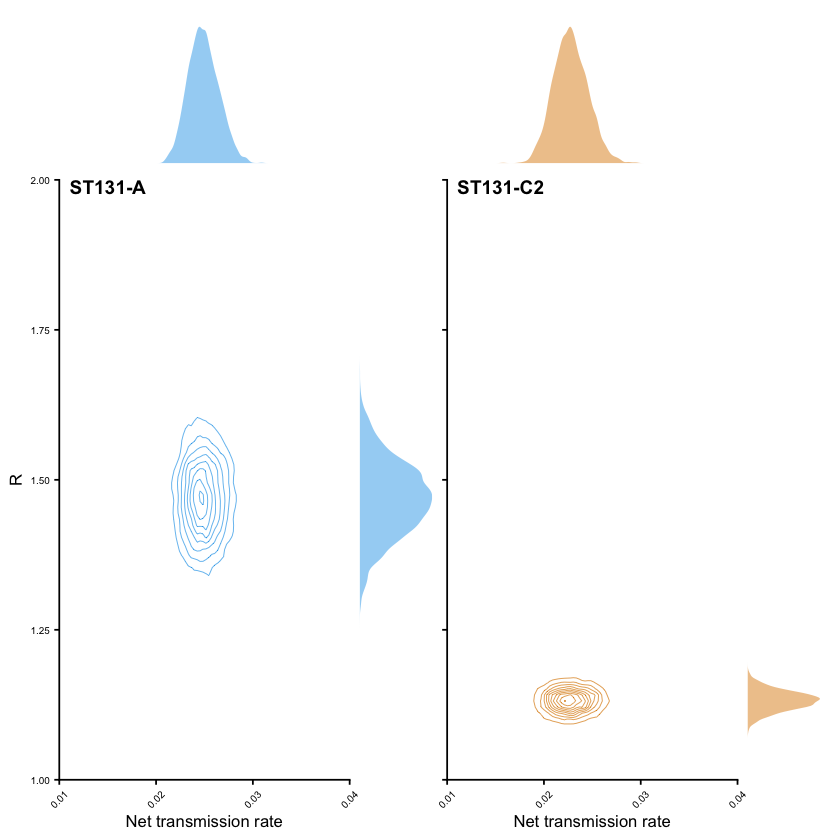

In [19]:
p_posterior_fig <- p_d_beta_A + plot_spacer() + p_d_beta_C2 + plot_spacer() + p_joint_A + p_d_gamma_A + p_joint_C2 + p_d_gamma_C2 +
plot_layout(ncol = 4, nrow = 2, widths = c(4,1,4,1), heights = c(1,4))

p_posterior_fig

In [20]:
# Combine R0 and posterior figures to create Figure 2:

ggsave(p_R0 + p_posterior_fig + plot_layout(ncol = 2, widths = c(1,2)), filename = paste(savedir, "posterior_panel.pdf", sep = ""), width = 17.8, height = 8, unit = "cm")

### Figure 3: Fit to data

The fit of the estimated parameters to data. Median and 95% credible intervals are included. 

In [21]:
# Get the median and 95% CIs for a clade of interest

get_cis <- function(pred, years, a = 0.95, l = 0.5){
    # Find 95% CIs, pointwise

    df_fit <- as.data.frame(t(apply(pred, 2, quantile, c((1-a)/2, 1 - (1-a)/2))))
    df_fit50 <- as.data.frame(t(apply(pred, 2, quantile, c((1-l)/2, 1 - (1-l)/2))))
    df_fit100 <- as.data.frame(t(apply(pred, 2, quantile, c(0, 1))))
    df_fit <- cbind(df_fit, df_fit50)
    df_fit <- cbind(df_fit, df_fit100)
    
    # Find the median, pointwise
    df_fit$med <- apply(pred, 2, median)
    df_fit$Year <- years

    colnames(df_fit) <- c("ciu", "cil", "ciu50", "cil50", "ciu100", "cil100", "med", "Year")
    
    return(df_fit)
}

df_fit_A <- get_cis(pred_A, obs_data$Year, a = 0.95)
df_fit_C2 <- get_cis(pred_C2, 2007:2017, a = 0.95)

In [22]:
# Combine clades A and C2

df_fit_A$clade <- rep("A", dim(df_fit_A)[1])
df_fit_C2$clade <- rep("C2", dim(df_fit_C2)[1])

df_fit <- rbind(df_fit_A, df_fit_C2)
df_fit$Data <- rep("Estimated", dim(df_fit)[1])

# Add observed data as an extra row:

mutate_obs_data <- function(obs_data, clade){
    # Format observed data for rbind with estimated data
    
    obs_df <- obs_data[,c(clade, "Year")]
    obs_df$clade <- rep(clade, dim(obs_df)[1])
    names(obs_df)[names(obs_df) == clade] <- "med"
    
    # Add placeholder columns for CIs
    obs_df["cil"] <- rep(NA, dim(obs_df)[1])
    obs_df["ciu"] <- rep(NA, dim(obs_df)[1])
    obs_df["cil50"] <- rep(NA, dim(obs_df)[1])
    obs_df["ciu50"] <- rep(NA, dim(obs_df)[1])
    obs_df["cil100"] <- rep(NA, dim(obs_df)[1])
    obs_df["ciu100"] <- rep(NA, dim(obs_df)[1])
    
    
    obs_df$Data <- rep("Observed", dim(obs_df)[1])
    
    return(obs_df)

}


obs_df_A <- mutate_obs_data(obs_data, "A")
obs_df_C2 <- mutate_obs_data(obs_data[4:14,], "C2")

df_fit <- rbind(df_fit, rbind(obs_df_A, obs_df_C2))

head(df_fit)

,ciu,cil,ciu50,cil50,ciu100,cil100,med,Year,clade,Data
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
X0,1,10,4,7,0,15,5,2004,A,Estimated
X1,1,10,4,7,0,15,5,2005,A,Estimated
X2,1,10,4,7,0,16,5,2006,A,Estimated
X3,1,10,4,7,0,17,5,2007,A,Estimated
X4,1,10,4,7,0,17,5,2008,A,Estimated
X5,2,11,4,8,0,20,6,2009,A,Estimated


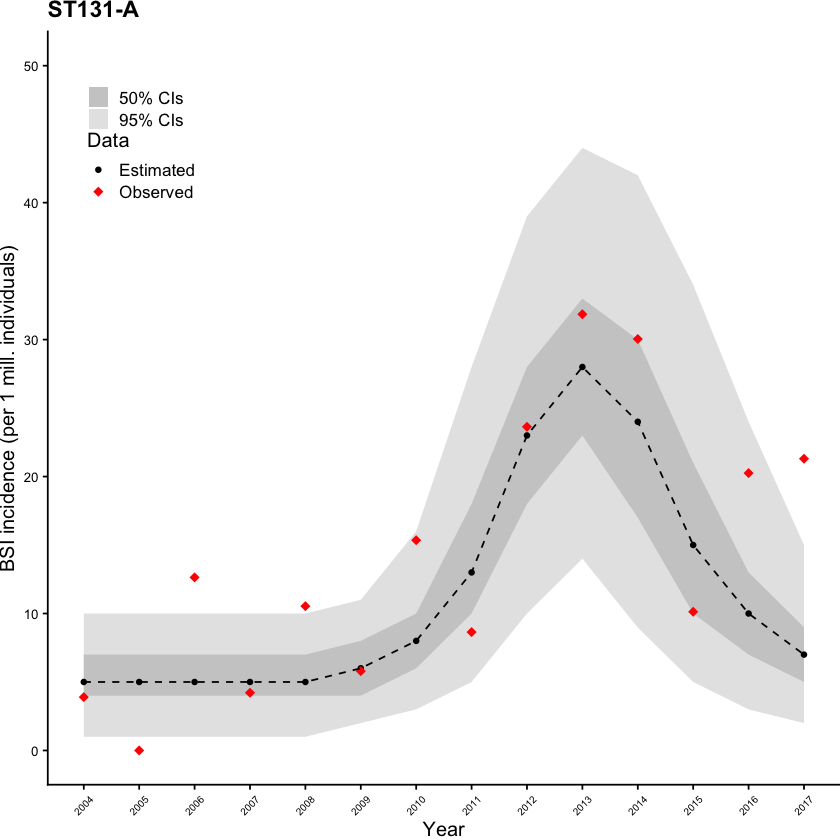

In [23]:
ylim_max <- 50

p_fit_A <- ggplot(df_fit[which(df_fit$clade == "A"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit[which(df_fit$clade == "A" & df_fit$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "BSI incidence (per 1 mill. individuals)", title = "ST131-A") + # expression("R"["BSI"])
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", labels = as.character(obs_data$Year), breaks = obs_data$Year) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 6),
          axis.text.y = element_text(size = 8),
          legend.position = c(0.05, 0.85),
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_A

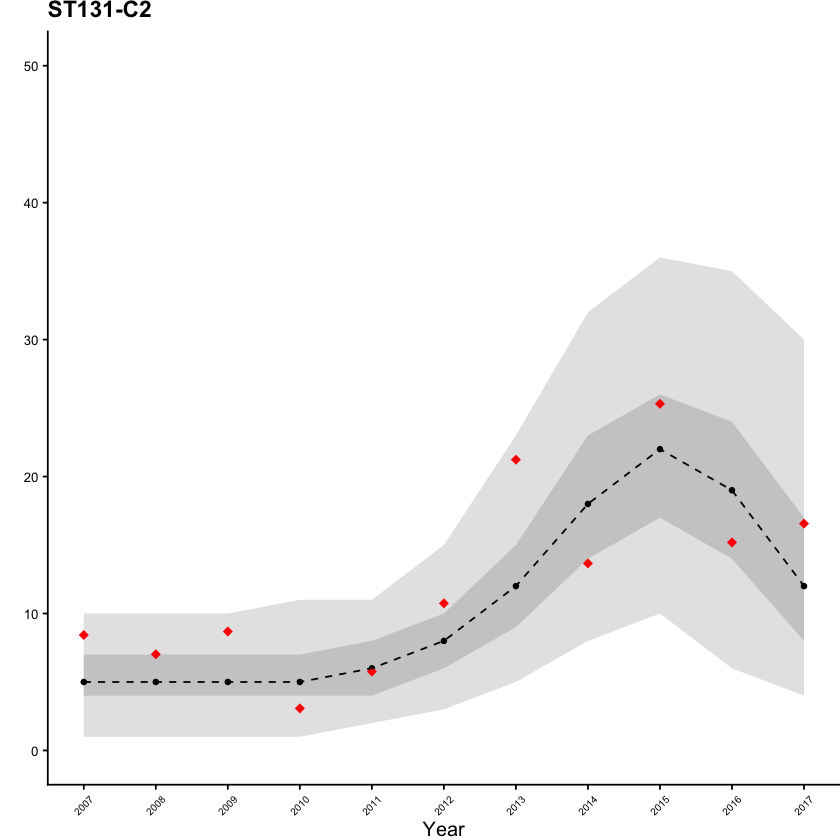

In [24]:
p_fit_C2 <- ggplot(df_fit[which(df_fit$clade == "C2"),], aes(x = Year, y = med)) +
    geom_ribbon(aes(ymin = cil, ymax = ciu, fill = "grey90"), na.rm = TRUE) + 
    geom_ribbon(aes(ymin = cil50, ymax = ciu50, fill = "grey80"), na.rm = TRUE) +
    #geom_ribbon(aes(ymin = cil100, ymax = ciu100), na.rm = TRUE, color = "gray70", fill = NA, lty = "dashed") +
    geom_point(aes(y = med, color = Data, shape = Data, size = Data)) +
    geom_line(data = df_fit[which(df_fit$clade == "C2" & df_fit$Data == "Estimated"),], aes(y = med), linetype = "dashed") +
    scale_fill_identity(name = NULL, guide = 'legend',labels = c('50% CIs', "95% CIs")) +
    scale_color_manual(values = c("black", "red")) +
    scale_shape_manual(values = c(16, 18)) +
    labs(y = "", title = "ST131-C2") +
    scale_size_manual(values = c(1.5, 2.5)) +
    scale_x_continuous("Year", labels = as.character(obs_data$Year), breaks = obs_data$Year) +
    coord_cartesian(ylim = c(0, ylim_max)) +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 6),
          axis.text.y = element_text(size = 8),
          legend.position = "none",
          plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.spacing.y = unit(0, "pt"), legend.margin = margin(0, 0, 0, 0))

p_fit_C2

pdf 
  2

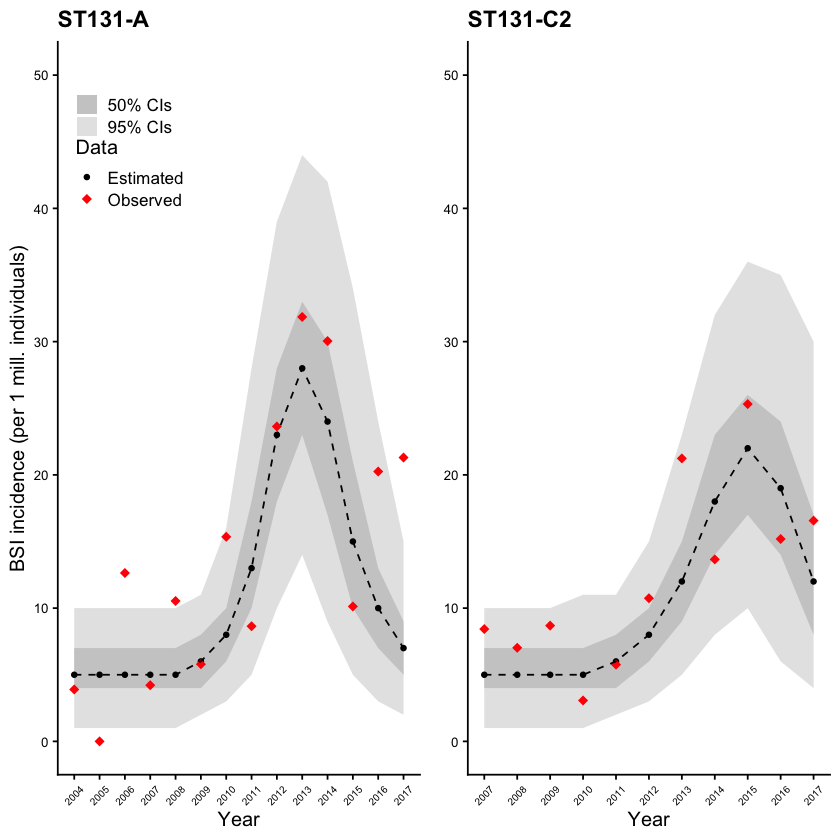

In [25]:
p_fit_A + p_fit_C2

pdf(paste(savedir, "fit.pdf", sep = ""), width = wwide, height = wwide)
p_fit_A + p_fit_C2
dev.off()

ggsave(p_fit_A + p_fit_C2, filename = paste(savedir, "fit.pdf", sep = ""), width = 11.4, height = 10, units = "cm")

# Supporting Information

### Fig. S1: Estimated Colonisation

Mean, median and 95% CIs for the estimated colonisation, corresponding to the accepted posterior.

In [26]:
get_cis_col <- function(col, a = 0.95, l = 0.5){
    # Get CIs and median for each week of posterior draws for the colonisation by clade A or C2
    # col: n_posterior_draws x n_col

    # Find 95% CIs, pointwise
    df_fit <- t(apply(col, 2, quantile, c((1-a)/2, 1 - (1-a)/2)))
    df_fit50 <- t(apply(col, 2, quantile, c((1-l)/2, 1 - (1-l)/2)))
    df_fit <- cbind(df_fit, df_fit50)
    
    # Find the median, pointwise
    df_fit <- cbind(df_fit, as.matrix(apply(col, 2, median)))
    rownames(df_fit) <- NULL
    colnames(df_fit) <- c("cil", "ciu", "cil50", "ciu50", "med")
    df_fit <- as.data.frame(df_fit)
    
    # Add week number
    df_fit$week <-  1:dim(col)[2]

    return(df_fit)
}

# Read colonisation posterior, add CIs and median for each week

col_A <- read.csv(paste(dir_A, "SIR_I_node.csv", sep = ""))
col_C2 <- read.csv(paste(dir_C2, "SIR_I_node.csv", sep = ""))

df_col_A <- get_cis_col(col_A, a = 0.95)
df_col_C2 <- get_cis_col(col_C2, a = 0.95)

df_col_A$clade <- rep("A", dim(df_col_A)[1])
df_col_C2$clade <- rep("C2", dim(df_col_C2)[1])

df_col <- rbind(df_col_A, df_col_C2)

head(df_col)
dim(df_col)

,cil,ciu,cil50,ciu50,med,week,clade
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1.000000,1.000000,1.000000,1.000000,1.000000,1,A
2,1.022329,1.028479,1.024067,1.026287,1.025149,2,A
3,1.045156,1.057769,1.048713,1.053266,1.050930,3,A
4,1.068493,1.087894,1.073952,1.080953,1.077359,4,A
5,1.092351,1.118876,1.099798,1.109368,1.104453,5,A
6,1.116742,1.150740,1.126267,1.138531,1.132229,6,A


[1] 1820    7

In [27]:
max(df_col_C2$week)

[1] 832

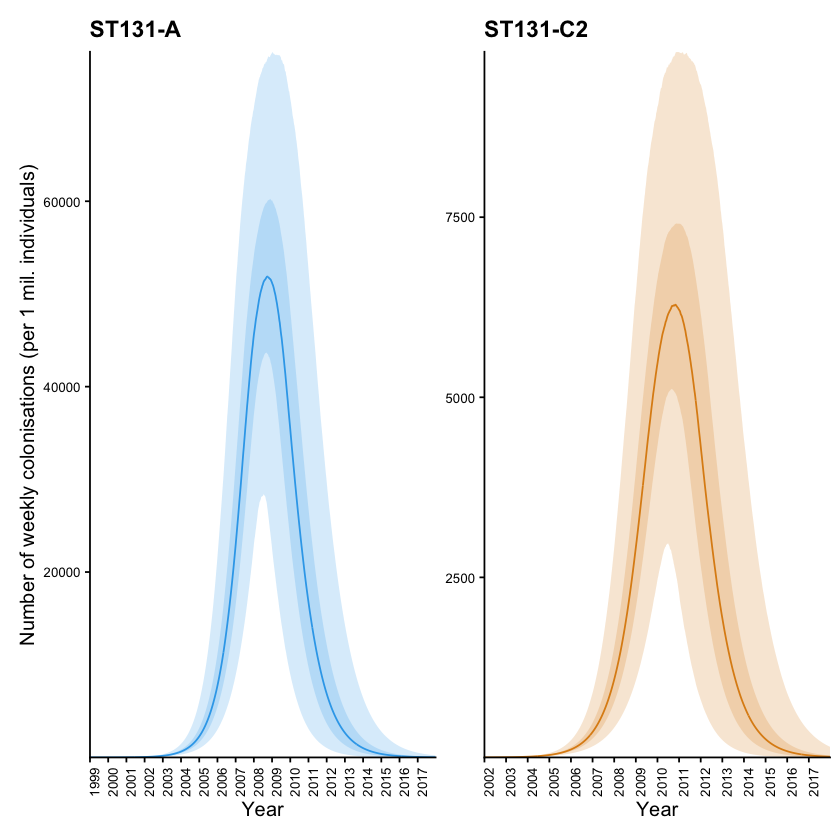

In [28]:
# Two colonisation curves in their own figures

max_year_A <- max(df_fit[df_fit$clade == "A", "Year"])
max_year_C2 <- max(df_fit[df_fit$clade == "C2", "Year"])
clade_A_years <- seq(max_year_A - max(df_col[df_col$clade == "A", "week"])/52 + 1, max_year_A, by = 1)
clade_C2_years <- seq(max_year_C2 - max(df_col[df_col$clade == "C2", "week"])/52 + 1, max_year_C2, by = 1)

#clade_A_years <- clade_A_years[seq(1, length(clade_A_years), by = 2)]
#clade_C2_years <- clade_C2_years[seq(1, length(clade_C2_years), by = 2)]
clade_A_breaks <- seq(1, max(df_col[df_col$clade == "A", "week"]), by = 52)
clade_C2_breaks <- seq(1, max(df_col[df_col$clade == "C2", "week"]), by = 52)

p_col_A <- ggplot(df_col[which(df_col$clade == "A"),], aes(x = week, y = med), color = A_col, fill = A_col) +
        geom_ribbon(aes(ymin = cil50, ymax = ciu50),color = NA, fill = A_col, alpha = 0.2) +
        geom_ribbon(aes(ymin = cil, ymax = ciu),color = NA, fill = A_col, alpha = 0.2) +
        geom_line(aes(y = med, color = clade), color = A_col) +
        scale_x_continuous(breaks = clade_A_breaks, labels = clade_A_years) +
        coord_cartesian(expand = FALSE) +
        labs(x = "Year", y = "Number of weekly colonisations (per 1 mil. individuals)", title = "ST131-A") +
        theme(axis.text.x = element_text(angle = 90, size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))


p_col_C2 <- ggplot(df_col[which(df_col$clade == "C2"),], aes(x = week, y = med)) +
        geom_ribbon(aes(ymin = cil50, ymax = ciu50),color = NA, fill = C2_col, alpha = 0.2) +
        geom_ribbon(aes(ymin = cil, ymax = ciu),color = NA, fill = C2_col, alpha = 0.2) +
        geom_line(aes(y = med, color = clade), color = C2_col) +
        scale_x_continuous(breaks = clade_C2_breaks, labels = clade_C2_years) +
        coord_cartesian(expand = FALSE) +
        labs(x = "Year", y = "", title = "ST131-C2") +
        theme(legend.position = "none",
        plot.margin = unit(c(0, 0, 0, 0), "cm"), axis.text.y = element_text(size = y_ax_fs), axis.title.y = element_blank(), axis.text.x = element_text(angle = 90, size = y_ax_fs)) 

p_col_A + p_col_C2

ggsave(p_col_A + p_col_C2, filename = paste(savedir, "colonisation.pdf", sep = ""), width = 14, height = 11.4, units = "cm") # 11.4 or 8.7, width = 8.7, height = 8.7, units = "cm"

### Fig. S3: Discrepancies

Discrepancies between observed and simulated values for clades A and C2, visualized as a scatterplot with posterior $\gamma$ on the y-axis and $\beta$ on the x-axis. The color of the points denotes the magnitude of the discrepancy.

In [29]:
disc_samples_A <- read.csv(paste(dir_A, "result_discrepancies.csv", sep = ""), header = T)
disc_samples_C2 <- read.csv(paste(dir_C2, "result_discrepancies.csv", sep = ""), header = T)

# Modify data
disc_A <- cbind(disc_samples_A, posterior_samples_A[par1_var], posterior_samples_A[par2_var])
names(disc_A) <- c("discrepancy", par1_var, par2_var)
disc_C2 <- cbind(disc_samples_C2, posterior_samples_C2[par1_var], posterior_samples_C2[par2_var])
names(disc_C2) <- c("discrepancy", par1_var, par2_var)

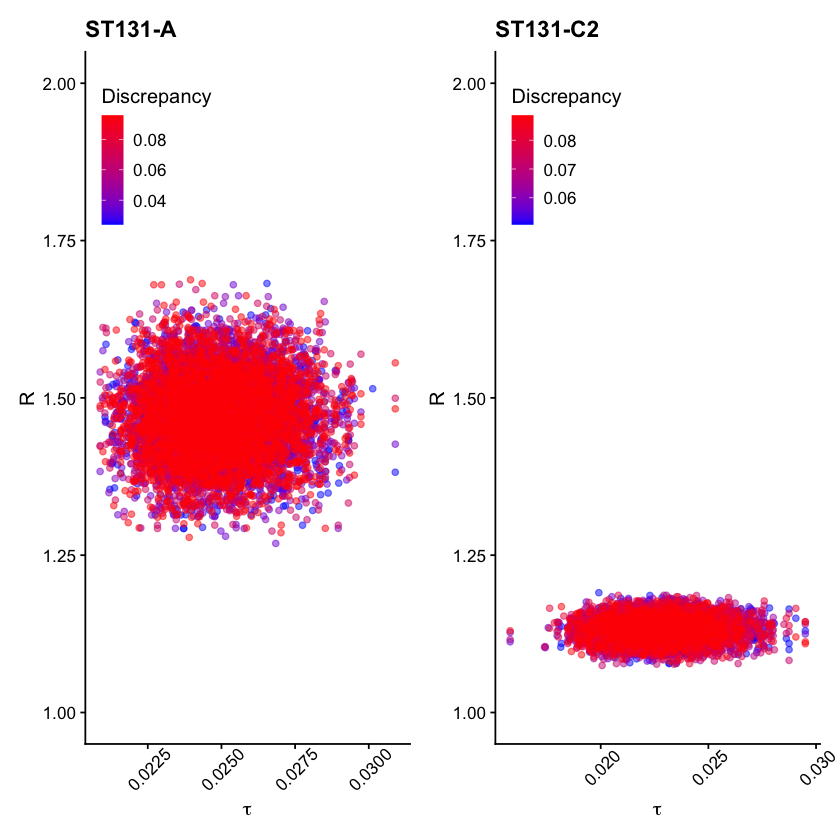

In [39]:
# Scatterplot of discrepancy
get_disc_figure_scatter <- function(disc, cladetag, xmax = 0.1, ymax = 0.075, xmin = 0.04, ymin = 0){
    # Make a scatterplot with discrepancy as color and beta, gamma on the x- and y-axis.
    #print(expression(bquote(gamma)~", "~bquote(beta)~") -pairs"))
    #main_title <- paste(c(cladetag, ": (", bquote(gamma), ", ", bquote(beta), ") -pairs"), sep = "")
    #main_title <- paste(cladetag, ": ",)
    #print(main_title)
    p <- ggplot(disc, aes(x = par1, y = par2, color = discrepancy)) +
    #geom_point(alpha = 0.5) +
    #scale_x_continuous(limits = c(xmin, xmax)) +
    scale_y_continuous(limits = c(ymin, ymax)) +
    #coord_cartesian(xlim = c(xmin, xmax), ylim = c(ymin, ymax)) +
    #scale_colour_gradient(low = "blue", high = "red") +
    geom_point(aes(color = discrepancy), alpha = 0.5)+
    scale_colour_gradient(low = "blue", high = "red") +
    labs(x = expression(tau),
        y = par2_name,
        title = cladetag,
        colour = "Discrepancy") +
        theme(legend.position = c(0.05, 0.85), axis.text.x = element_text(angle = 45, vjust = 0.7))
    #bquote(beta)

    return(p)
}


disc_A_fig <- get_disc_figure_scatter(disc_A, cladetag = "ST131-A", ymin = 1, ymax = 2.0)
disc_C2_fig <- get_disc_figure_scatter(disc_C2, cladetag = "ST131-C2", ymin = 1, ymax = 2.0)

disc_A_fig + disc_C2_fig


ggsave(disc_A_fig + disc_C2_fig, filename = paste(savedir, "discrepancy.pdf", sep = ""), width = 12, height = 12, units = "cm")





### Fig. S4: ST131-A Posterior

Posterior distributions, joint and marginal, for all parameters including $D_t$.

In [31]:
df_A_Dt_unscaled <- df_A
df_C2_Dt_unscaled <- df_C2
df_A_Dt_unscaled$Dt <- df_A_Dt_unscaled$Dt*1000
df_C2_Dt_unscaled$Dt <- df_C2_Dt_unscaled$Dt*1000

# Note: the unscaled Dt is in weeks, not years!

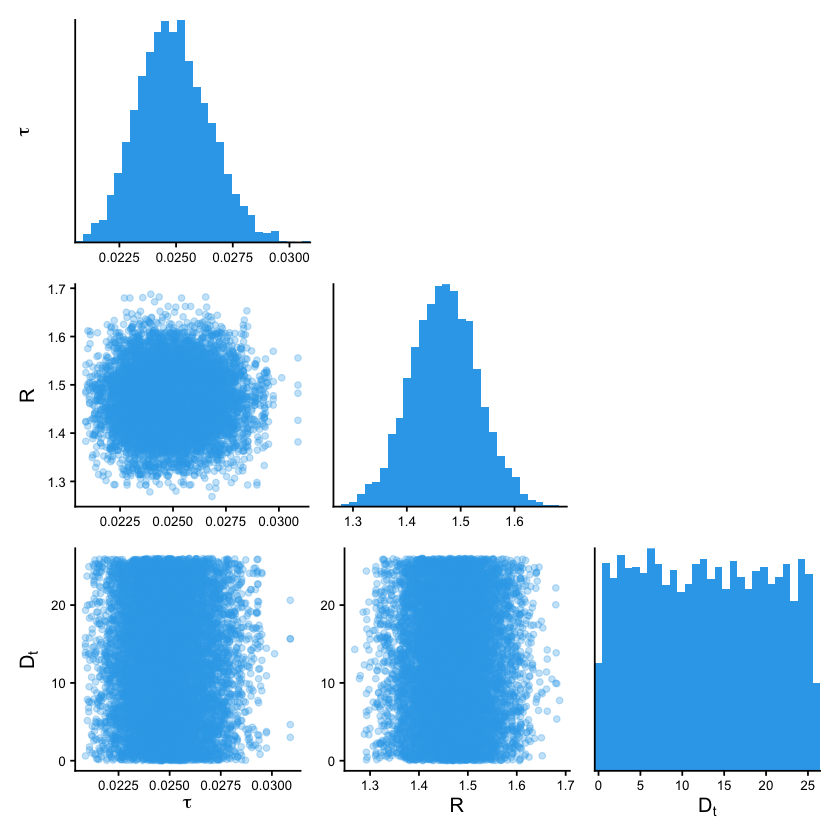

In [32]:
# Joint posterior of lambda, alpha, gamma, beta -> plot_pairs style

p_beta_A <- ggplot(df_A[which(df_A$distr == "Posterior"),], aes(x = par1)) +
    geom_histogram(position = "identity", bins = 30, fill = A_col) +
    labs(x = NULL, title = NULL, y = expression(tau)) +
    theme_cowplot(12) +
    coord_cartesian(expand = FALSE) +
    theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

p_gamma_A <- ggplot(df_A[which(df_A$distr == "Posterior"),], aes(x = par2)) +
    geom_histogram(position = "identity", bins = 30, fill = A_col) +
    labs(x = NULL, title = NULL, y = NULL) +
    theme_cowplot(12) +
    coord_cartesian(expand = FALSE) +
    theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

p_bg_A <- ggplot(df_A[which(df_A$distr == "Posterior"),], aes(x = par1, y = par2)) +
    geom_point(alpha = 0.3, color = A_col) + 
    labs(title = NULL, x = NULL, y = par2_name) +
    theme_cowplot(12) +
    theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

p_Dt_A <- ggplot(df_A_Dt_unscaled[which(df_A_Dt_unscaled$distr == "Posterior"),], aes(x = Dt)) +
    geom_histogram(position = "identity", bins = 30, fill = A_col) +
    labs(x = expression(D[t]), title = NULL, y = NULL) +
    theme_cowplot(12) +
    coord_cartesian(expand = FALSE) +
    theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

p_par1_Dt_A <- ggplot(df_A_Dt_unscaled[which(df_A_Dt_unscaled$distr == "Posterior"),], aes(x = par1, y = Dt)) +
    geom_point(alpha = 0.3, color = A_col) + 
    labs(title = NULL, x = expression(tau), y = expression(D[t])) +
    theme_cowplot(12) +
    theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

p_par2_Dt_A <- ggplot(df_A_Dt_unscaled[which(df_A_Dt_unscaled$distr == "Posterior"),], aes(x = par2, y = Dt)) +
    geom_point(alpha = 0.3, color = A_col) + 
    labs(title = NULL, x = par2_name, y = NULL) +
    theme_cowplot(12) +
    theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))


(p_beta_A + plot_spacer() + plot_spacer())/
(p_bg_A + p_gamma_A + plot_spacer())/
(p_par1_Dt_A + p_par2_Dt_A + p_Dt_A)

ggsave((p_beta_A + plot_spacer() + plot_spacer())/
(p_bg_A + p_gamma_A + plot_spacer())/
(p_par1_Dt_A + p_par2_Dt_A + p_Dt_A), filename = paste(savedir, "pairs_clade_A.pdf", sep = ""), width = 17.8, height = 17.8, units = "cm")

#(p_beta_A + plot_spacer())/(p_bg_A + p_gamma_A)

### Fig. S5: ST131-C2 Posterior

All parameters, including $D_t$.

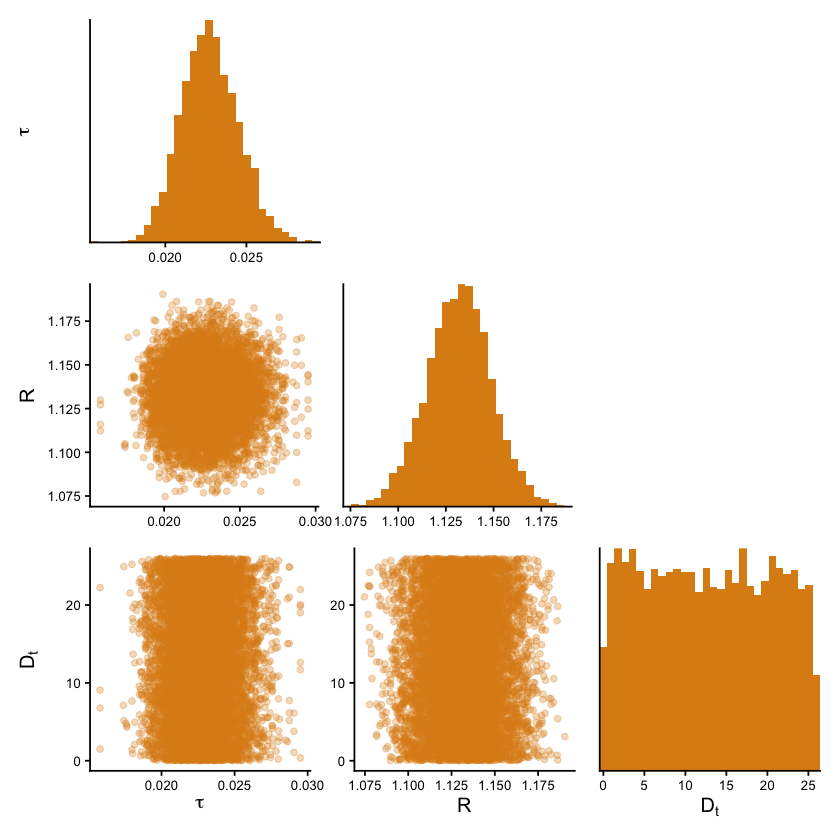

In [33]:
# Clade C2: joint posterior of lambda, alpha, gamma, beta -> plot_pairs style

p_beta_C2 <- ggplot(df_C2[which(df_C2$distr == "Posterior"),], aes(x = par1)) +
    geom_histogram(position = "identity", bins = 30, fill = C2_col) +
    labs(x = NULL, title = NULL, y = expression(tau)) +
    theme_cowplot(12) +
    coord_cartesian(expand = FALSE) +
    theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

p_gamma_C2 <- ggplot(df_C2[which(df_C2$distr == "Posterior"),], aes(x = par2)) +
    geom_histogram(position = "identity", bins = 30, fill = C2_col) +
    labs(x = NULL, title = NULL, y = NULL) +
    theme_cowplot(12) +
    coord_cartesian(expand = FALSE) +
    theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

p_bg_C2 <- ggplot(df_C2[which(df_C2$distr == "Posterior"),], aes(x = par1, y = par2)) +
    geom_point(alpha = 0.3, color = C2_col) + 
    labs(title = NULL, x = NULL, y = par2_name) +
    theme_cowplot(12) +
    theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

p_Dt_C2 <- ggplot(df_C2_Dt_unscaled[which(df_C2_Dt_unscaled$distr == "Posterior"),], aes(x = Dt)) +
    geom_histogram(position = "identity", bins = 30, fill = C2_col) +
    labs(x = expression(D[t]), title = NULL, y = NULL) +
    theme_cowplot(12) +
    coord_cartesian(expand = FALSE) +
    theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

p_par1_Dt_C2 <- ggplot(df_C2_Dt_unscaled[which(df_C2_Dt_unscaled$distr == "Posterior"),], aes(x = par1, y = Dt)) +
    geom_point(alpha = 0.3, color = C2_col) + 
    labs(title = NULL, x = expression(tau), y = expression(D[t])) +
    theme_cowplot(12) +
    theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

p_par2_Dt_C2 <- ggplot(df_C2_Dt_unscaled[which(df_C2_Dt_unscaled$distr == "Posterior"),], aes(x = par2, y = Dt)) +
    geom_point(alpha = 0.3, color = C2_col) + 
    labs(title = NULL, x = "R", y = NULL) +
    theme_cowplot(12) +
    theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

(p_beta_C2 + plot_spacer() + plot_spacer())/
(p_bg_C2 + p_gamma_C2 + plot_spacer())/
(p_par1_Dt_C2 + p_par2_Dt_C2 + p_Dt_C2)

ggsave((p_beta_C2 + plot_spacer() + plot_spacer())/
(p_bg_C2 + p_gamma_C2 + plot_spacer())/
(p_par1_Dt_C2 + p_par2_Dt_C2 + p_Dt_C2), filename = paste(savedir, "pairs_clade_C2.pdf", sep = ""), width = 17.8, height = 17.8, units = "cm")



# Comparison of parametrization

Comparison of the parametrization: posterior pairplot parametrized with the transmission coefficient $\beta$ and the recovery rate $\gamma$.

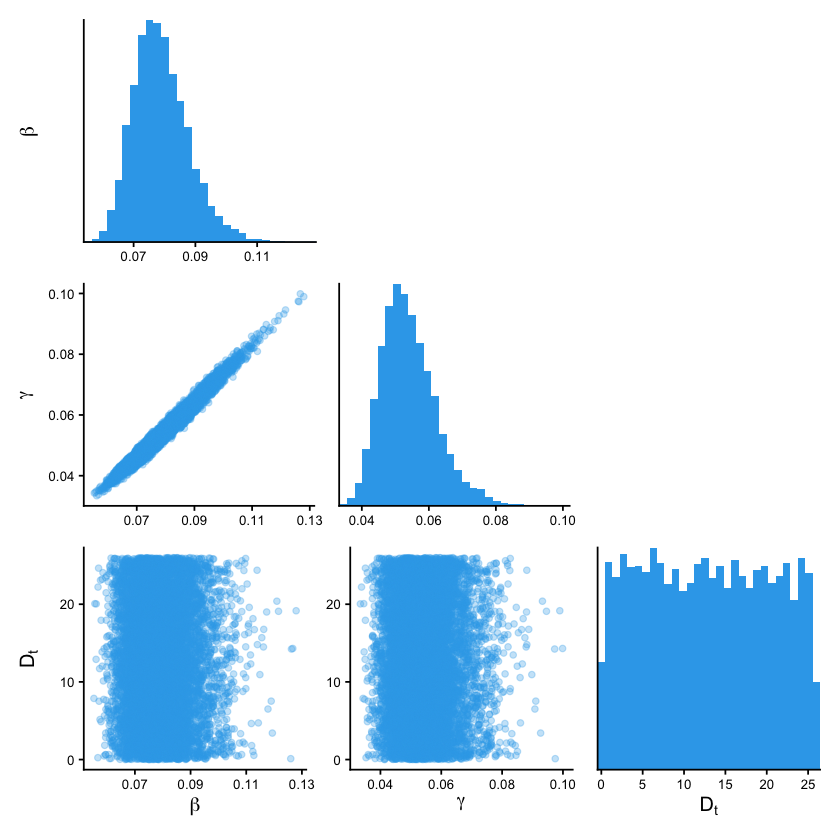

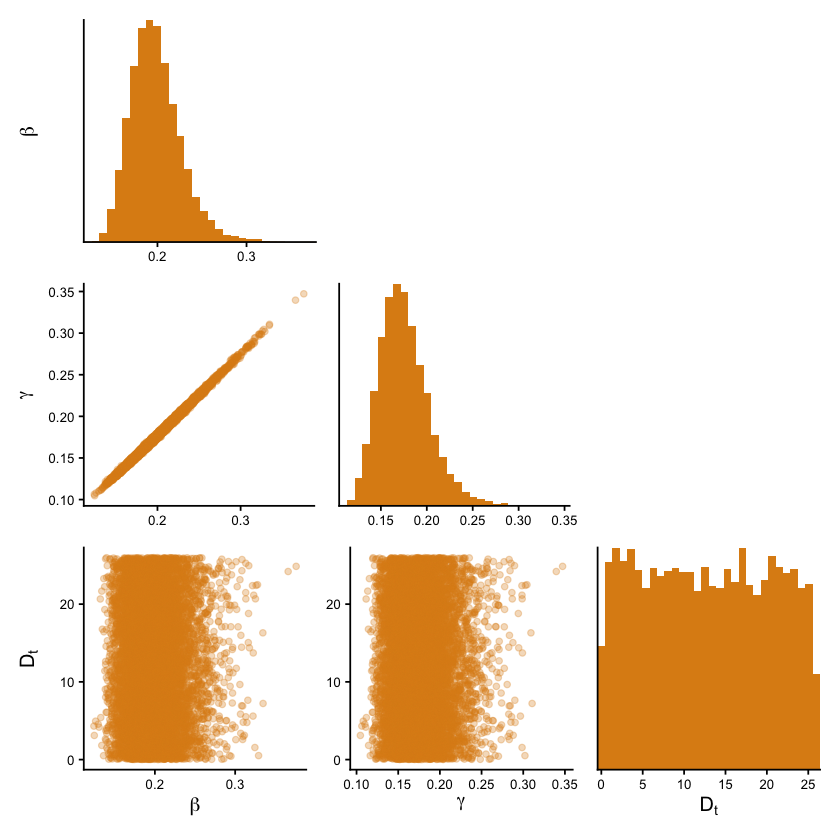

In [34]:
get_beta_gamma_pairsplot <- function(df, clade){
    # Get the beta-gamma parametrized version of posterior pair plot visualisation.

    df_bg <- df
    df_bg$beta <- df$par1*df$par2/(df$par2 - 1)
    df_bg$gamma <- df$par1/(df$par2 - 1)

    df_bg$Dt <- df_bg$Dt*1000
    
    if(clade == "A"){
        plot_color = A_col}
    else{
        plot_color = C2_col
        }

    
    p_beta <- ggplot(df_bg[which(df_bg$distr == "Posterior"),], aes(x = beta)) +
        geom_histogram(position = "identity", bins = 30, fill = plot_color) +
        labs(x = NULL, title = NULL, y = expression(beta)) +
        theme_cowplot(12) +
        coord_cartesian(expand = FALSE) +
        theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

    p_gamma <- ggplot(df_bg[which(df_bg$distr == "Posterior"),], aes(x = gamma)) +
        geom_histogram(position = "identity", bins = 30, fill = plot_color) +
        labs(x = NULL, title = NULL, y = NULL) +
        theme_cowplot(12) +
        coord_cartesian(expand = FALSE) +
        theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))


    p_bg <- ggplot(df_bg[which(df_bg$distr == "Posterior"),], aes(x = beta, y = gamma)) +
        geom_point(alpha = 0.3, color = plot_color) + 
        labs(title = NULL, x = NULL, y = expression(gamma)) +
        theme_cowplot(12) +
        theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

    p_Dt <- ggplot(df_bg[which(df_bg$distr == "Posterior"),], aes(x = Dt)) +
        geom_histogram(position = "identity", bins = 30, fill = plot_color) +
        labs(x = expression(D[t]), title = NULL, y = NULL) +
        theme_cowplot(12) +
        coord_cartesian(expand = FALSE) +
        theme(axis.text.y = element_blank(), axis.ticks.y=element_blank(), axis.text.x = element_text(size = y_ax_fs))

    p_beta_Dt <- ggplot(df_bg[which(df_bg$distr == "Posterior"),], aes(x = beta, y = Dt)) +
        geom_point(alpha = 0.3, color = plot_color) + 
        labs(title = NULL, x = expression(beta), y = expression(D[t])) +
        theme_cowplot(12) +
        theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

    p_gamma_Dt <- ggplot(df_bg[which(df_bg$distr == "Posterior"),], aes(x = gamma, y = Dt)) +
        geom_point(alpha = 0.3, color = plot_color) + 
        labs(title = NULL, x = expression(gamma), y = NULL) +
        theme_cowplot(12) +
        theme(axis.text.x = element_text(size = y_ax_fs), axis.text.y = element_text(size = y_ax_fs))

    #(p_beta + plot_spacer()) / (p_bg + p_gamma)
    (p_beta + plot_spacer() + plot_spacer()) /
    (p_bg + p_gamma + plot_spacer())/
    (p_beta_Dt + p_gamma_Dt + p_Dt)

}

pA <- get_beta_gamma_pairsplot(df_A, clade = "A")
pC2 <- get_beta_gamma_pairsplot(df_C2, clade = "C2")

pA
pC2

ggsave(pA, filename = paste(savedir, "pairs_bg_clade_A.pdf", sep = ""), width = 17.8, height = 17.8, units = "cm")
ggsave(pC2, filename = paste(savedir, "pairs_bg_clade_C2.pdf", sep = ""), width = 17.8, height = 17.8, units = "cm")





# Diagnostics

## Discrepancies for SMC populations

In [205]:
# Load the population data:

pop_df_A <- read.csv(paste(dir_A, "result_pop_samples.csv", sep = ""))
pop_df_C2 <- read.csv(paste(dir_C2, "result_pop_samples.csv", sep = ""))

pop_df_A$Clade <- rep("ST131-A", dim(pop_df_A)[1])
pop_df_C2$Clade <- rep("ST131-C2", dim(pop_df_C2)[1])

pop_df <- rbind(pop_df_A, pop_df_C2)
pop_df$eps <- as.character(pop_df$eps)
head(pop_df)

,par1,par2,Dt,eps,Clade
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0.02013707,1.386490,0.004857033,1,ST131-A
2,0.02455818,1.244270,0.001748218,1,ST131-A
3,0.02138032,1.240076,0.014663429,1,ST131-A
4,0.02690492,1.695996,0.007278758,1,ST131-A
5,0.02453989,1.471362,0.014548919,1,ST131-A
6,0.02415287,1.238225,0.001173616,1,ST131-A


Saving 7 x 7 in image


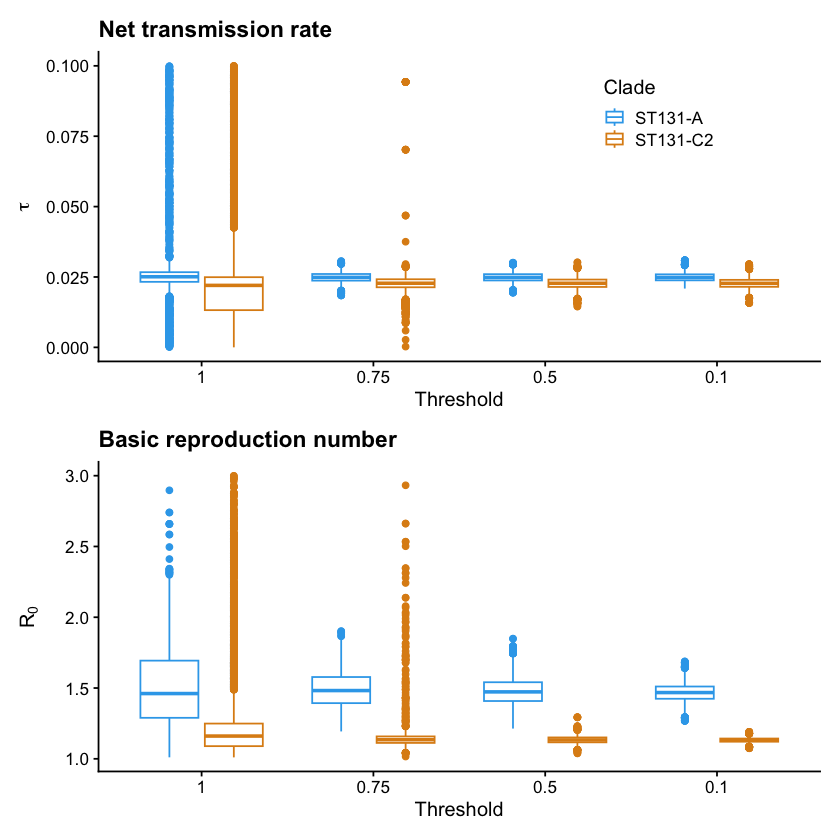

In [208]:
# Boxplot for convergence

p1 <- ggplot(pop_df, aes(x = eps, y = par1, color = Clade)) +
    geom_boxplot() +
    labs(y = expression(tau), x = "Threshold", title = "Net transmission rate") +
    scale_x_discrete(limits = rev) +
    scale_color_manual(values = c(A_col, C2_col)) +
    theme(legend.position = c(0.7, 0.8))

p2 <- ggplot(pop_df, aes(x = eps, y = par2, color = Clade)) +
    geom_boxplot() +
    labs(y = expression(R[0]), x = "Threshold", title = "Basic reproduction number") +
    scale_x_discrete(limits = rev) +
    scale_color_manual(values = c(A_col, C2_col)) +
    theme(legend.position = "none")

p1 / p2

ggsave(p1 / p2, filename = paste(savedir, "inference_boxplot.pdf", sep = ""))


## Prior sensitivity historgram

In [37]:
prior_sample <- prior_samples_A

head(prior_sample)

,par1,par2,Dt,distr
,<dbl>,<dbl>,<dbl>,<chr>
1,0.004909537,1.627365,0.01800077,Prior
2,0.041802201,2.091488,0.01779738,Prior
3,0.048646967,1.348594,0.01579600,Prior
4,0.008240884,1.830930,0.01031892,Prior
5,0.023954930,2.825804,0.01487376,Prior
6,0.002126455,1.163266,0.01154756,Prior


Saving 7 x 7 in image


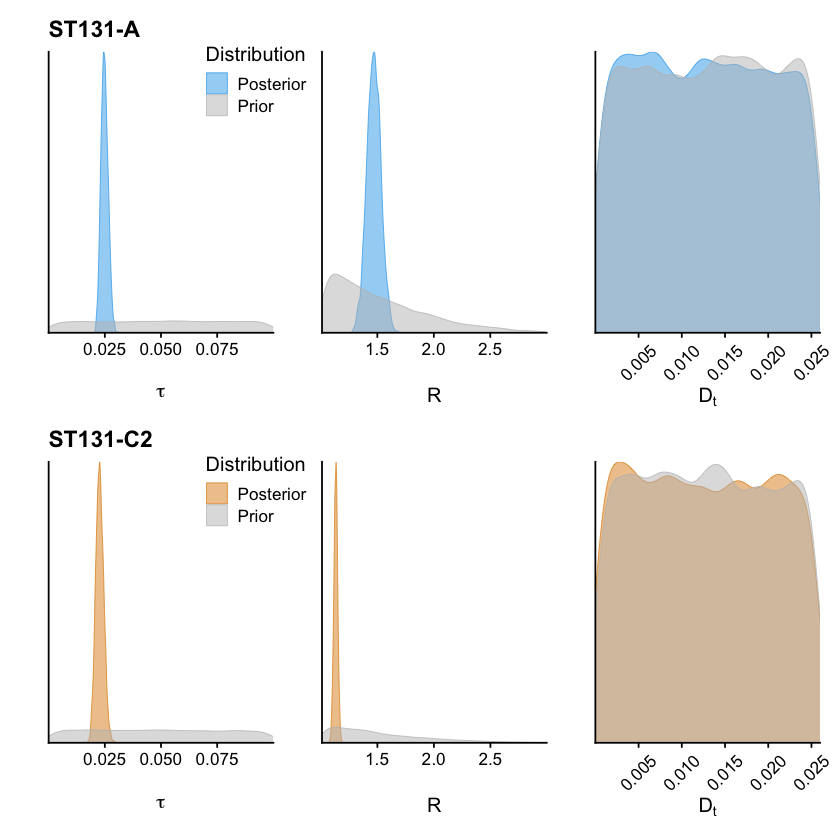

In [38]:
# Plot the density of the prior and posterior


plot_prior_sensitivity <- function(post_sample, prior_sample, col, p1_title = "NA"){
    # Plot the posterior and prior distributions for each parameter as a denisty plot
    
    full_sample <- rbind(post_sample, prior_sample)
    
    p1 <- ggplot(full_sample, aes(x = par1, fill = distr)) +
        geom_density(aes(color = distr), linewidth = 0.2, alpha = 0.5) +
        scale_fill_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        scale_color_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        labs(x = expression(tau), y = "", title = p1_title) +
        coord_cartesian(expand = FALSE) +
        theme(legend.position = c(0.7, 0.9), axis.text.y = element_blank(), axis.ticks.y = element_blank())
    
    p2 <- ggplot(full_sample, aes(x = par2, fill = distr)) +
        geom_density(aes(color = distr), linewidth = 0.2, alpha = 0.5) +
        scale_fill_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        scale_color_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        labs(x = "R", y = "", title = "") +
        coord_cartesian(expand = FALSE) +
        theme(legend.position="none", axis.text.y = element_blank(), axis.ticks.y = element_blank())
    
    
    p3 <- ggplot(full_sample, aes(x = Dt, fill = distr)) +
        geom_density(aes(color = distr), linewidth = 0.2, alpha = 0.5) +
        scale_fill_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        scale_color_manual(name = "Distribution", values = c(col, "grey"), labels = c("Posterior", "Prior")) + 
        labs(x = expression(D[t]), y = "", title = "") +
        coord_cartesian(expand = FALSE) +
        theme(legend.position="none", axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.text.x = element_text(angle = 45, vjust = 0.5))
    
    
    p1 + p2 + p3

}


p_A_prior <- plot_prior_sensitivity(posterior_samples_A, prior_samples_A, A_col, p1_title = "ST131-A")

p_C2_prior <- plot_prior_sensitivity(posterior_samples_C2, prior_samples_C2, C2_col, p1_title = "ST131-C2")

p_A_prior / p_C2_prior


ggsave(p_A_prior / p_C2_prior, filename = paste(savedir, "prior_sensitivity_dens.pdf", sep = ""))


